In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import read_csv, pivot_table
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('submission.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  2478 non-null   object
 1   first_party         2478 non-null   object
 2   second_party        2478 non-null   object
 3   facts               2478 non-null   object
 4   first_party_winner  2478 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 96.9+ KB


In [4]:
data['first_party'].value_counts()

first_party
United States       154
Illinois              9
Maryland              8
Florida               8
New York              7
                   ... 
David Carpenter       1
Larry Gene Heath      1
PGA TOUR, Inc.        1
PPL Montana, LLC      1
Markman               1
Name: count, Length: 2110, dtype: int64

In [5]:
data['second_party'].value_counts()

second_party
United States                        240
California                            19
United States of America              15
Illinois                              13
Federal Communications Commission     10
                                    ... 
David Boren, Governor of Oklahoma      1
Federal Bureau of Prisons et al.       1
Town of Harrison                       1
Charles Burr et al.                    1
Westview Instruments, Inc.             1
Name: count, Length: 1974, dtype: int64

In [6]:
# 출력 옵션 설정
# pd.set_option("display.max_rows", None) # 모든 행 표시 
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None) # 줄 바꿈 없이 전체 내용 표시
data['facts']

0       On June 27, 1962, Phil St. Amant, a candidate ...
1       Ramon Nelson was riding his bike when he suffe...
2       An Alabama state court convicted Billy Joe Mag...
3       Victor Linkletter was convicted in state court...
4       On April 24, 1953 in Selma, Alabama, an intrud...
                              ...                        
2473    Congress amended the Clean Air Act through the...
2474    Alliance Bond Fund, Inc., an investment fund, ...
2475    In 1992, the District Court sentenced Manuel D...
2476    On March 8, 1996, Enrico St. Cyr, a lawful per...
2477    Herbert Markman owns the patent to a system th...
Name: facts, Length: 2478, dtype: object

In [7]:
data.iloc[1]['facts']

'Ramon Nelson was riding his bike when he suffered a lethal blow to the back of his head with a baseball bat. After two eyewitnesses identified Lawrence Owens from an array of photos and then a lineup, he was tried and convicted for Nelson’s death. Because Nelson was carrying cocaine and crack cocaine potentially for distribution, the judge at Owens’ bench trial ruled that Owens was probably also a drug dealer and was trying to “knock [Nelson] off.” Owens was found guilty of first-degree murder and sentenced to 25 years in prison.\nOwens filed a petition for a writ of habeas corpus on the grounds that his constitutional right to due process was violated during the trial. He argued that the eyewitness identification should have been inadmissible based on unreliability and that the judge impermissibly inferred a motive when a motive was not an element of the offense. The district court denied the writ of habeas corpus, and Owens appealed. The U.S. Court of Appeals for the Seventh Circuit

In [8]:
data.iloc[0]['facts']

'On June 27, 1962, Phil St. Amant, a candidate for public office, made a television speech in Baton Rouge, Louisiana.  During this speech, St. Amant accused his political opponent of being a Communist and of being involved in criminal activities with the head of the local Teamsters Union.  Finally, St. Amant implicated Herman Thompson, an East Baton Rouge deputy sheriff, in a scheme to move money between the Teamsters Union and St. Amant’s political opponent. \nThompson successfully sued St. Amant for defamation.  Louisiana’s First Circuit Court of Appeals reversed, holding that Thompson did not show St. Amant acted with “malice.”  Thompson then appealed to the Supreme Court of Louisiana.  That court held that, although public figures forfeit some of their First Amendment protection from defamation, St. Amant accused Thompson of a crime with utter disregard of whether the remarks were true.  Finally, that court held that the First Amendment protects uninhibited, robust debate, rather t

###### 분류 문제에서 클래스 레이블의 불균형은 흔히 있는 일이다. 클래스가 불균형하면 모델도 그것에 양향을 받아 다수 클래스 쪽으로 편향이 되어 버린다.
###### 이럴 때 널리 사용하는 방법은 샘플링을 통해 훈련 데이터를 인공적으로 생성해서 클래스의 불균형을 줄이는 것이다.
###### 사이킷런의 resample은 데이터셋에서 중복을 허용해서 샘플을 추출한다. 아래와 같이 사용할 수 있다.
###### x,y = resample(샘플링할 X, 샘플링할 y, replace=True, n_samples=100)
###### 샘플링할 x와 y를 얻고 최종 개수를 넣어주면 그 개수가 될 때까지 무작위로 샘플링하여 반환한다.

In [9]:
# 샘플링하기 전 데이터의 불균형 확인하기
# 패소한 수
len(data[data["first_party_winner"] == 0].value_counts())

829

In [10]:
# 승소한 수
len(data[data["first_party_winner"] == 1].value_counts())

1649

In [11]:
# 불균형이 확인되어 패소한 수의 샘플링 데이터를 만들고 concat시키기
# 다운샘플링
from sklearn.utils import resample

subset_0 = data[data['first_party_winner'] == 0]
subset_1 = data[data['first_party_winner'] == 1]

subset_1_downsampled = resample(subset_1, replace=False, n_samples=800, random_state=42)
data = pd.concat([subset_0, subset_1_downsampled])
print(data)
# 승소한 사람의 수를 800으로 줄이기

              ID                                   first_party  \
1     TRAIN_0001                                Stephen Duncan   
3     TRAIN_0003                                    Linkletter   
14    TRAIN_0014                        James J. Thole, et al.   
16    TRAIN_0016                                        Plyler   
21    TRAIN_0021                          Bassam Yacoub Salman   
...          ...                                           ...   
951   TRAIN_0951  Ben Ysursa, Idaho Secretary of State, et al.   
1360  TRAIN_1360                        Michael Sexton, Warden   
1070  TRAIN_1070                                     Dickinson   
1035  TRAIN_1035                                       Georgia   
1513  TRAIN_1513         Anthony R. Tanner, William M. Conover   

                                 second_party  \
1                              Lawrence Owens   
3                                      Walker   
14                    U.S. Bank, N.A., et al.   
16         

###### corpus는 분석 작업을 위한 샘플 문서 집합을 말한다.
###### 코퍼스는(corpus)에서 토큰(token)이라 불리는 단위로 나누는 작업을 토큰화(tokenization)라고 한다.

###### 가장 대표적인 것은 단어 토큰화(토큰의 기준을 단어로 하는경우)
###### 구두점이나 특수 문자를 단순히 제외해서는 안된다.
###### Don't, Don t, Dont 등을 해결하기 위해
###### 자연어 처리를 위하여 nltk 모듈을 실행한다.

In [12]:
from transformers import AutoTokenizer, AutoModel, AutoConfig
from transformers.tokenization_utils import TruncationStrategy # 잘라내기

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer # 어간추출하기

nltk.download('punkt') # 문장부호
nltk.download('averaged_perceptron_tagger') 
# 품사 태깅(내용을 대표할 수 있는 키워드를 다는 것)하기
nltk.download('wordnet') # 동의어 찾기
# nltk.download('antonyms') # 반대말 찾기
# 등등 더 있으나 자주사용하는 것들만 소개

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
porter = PorterStemmer()

# step_1a_before_list = [r'(?:^|\s)([A-Za-z]+?)sses(?:\s|$)', \
#                         r'(?:^|\s)([A-Za-z]+?)ies', \
#                         r'(?:^|\s)([A-Za-z]+?)ss(?:\s|$)', \
#                         r'(?:^|\s)([A-Za-z]+?[^s])s(?:\s|$)']
# step_1a_after_list = [r' /\1ss/ ', r' /\1i/ ', r' /\1ss/ ', r' /\1/ '] ## //로 두번 적용을 막음
def stem_text_func(text):
    token_words=word_tokenize(text) # 단어 단위로 나누기
    stem_sentence = []
    for word in token_words:
        stem_sentence.append(porter.stem(word)) # stem은 word의 어간만을 추출한다
                                                # ex) stem('saying') = say만 추출
        stem_sentence.append(" ")
    return "".join(stem_sentence)
# amon Nelson was riding his bike when he suffered a lethal blow to the back of his head with a baseball bat.

In [14]:
from stop_words import get_stop_words # 등록된 불용어 삭제시키기 위해
# 불용어 리스트
# https://www.ranks.nl/stopwords/korean
#  nltk 라이브러리(영어 불용어를 이미 처리하고 있음)
languages = ['English']
my_stop_word_list = []
for i in languages:
    my_stop_word_list.append(get_stop_words(i.lower()))
my_stop_word_list = sum(my_stop_word_list, [])
my_stop_word_list = my_stop_word_list + ['paperbook', 'hardcover']
print(my_stop_word_list)

['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', "can't", 'cannot', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs', 'them', 'themselves', 't

In [15]:
# 영어불용어 처리할 떄 참고할 github
# https://gist.github.com/nealrs/96342d8231b75cf4bb82
contractions = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

In [16]:
import re 
# re는 regex 정규표현식(match(), search(), findall() 등 사용)
# re의 sub는 문자열에 맞는 패턴을 2번째 인자(교체할 문자열)로 교체합니다.
# ex) print(re.sub('a', 'z', 'aaaab')) # zzzzb
# main 단어만 추출 > 차후 이 단어들로 test
def preprocessing_sentence(sentence, remove_stopwords = True):
    #소문자화
    sentence = sentence.lower()
    #괄호로 닫친 문자열 괄호 제거
    sentence = re.sub(r'\([^)]*\)',' ',sentence)
    #쌍따옴표 제거
    sentence = re.sub('"', ' ', sentence) 
    #약어 정규화
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")])
    #소유격 제거
    sentence = re.sub(r"'s\b"," ",sentence)
    #특수문자 제거
    sentence = re.sub("[^a-zA-Z]"," ", sentence)
    
    #불용어 제거
    if my_stop_word_list:
        tokens = ' '.join(word for word in sentence.split() if not word in my_stop_word_list if len(word)>1)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word)>1)
    return tokens

In [17]:
data['facts'] = [preprocessing_sentence(i) for i in data['facts']]
test['facts'] = [preprocessing_sentence(i) for i in test['facts']]

In [18]:
data['facts'] = data['facts'].astype('str')
test['facts'] = test['facts'].astype('str')

In [19]:
facts_corpus_lose = ' '.join(data[data['first_party_winner'] == 0]['facts'])
facts_corpus_win = ' '.join(data[data['first_party_winner'] == 1]['facts'])

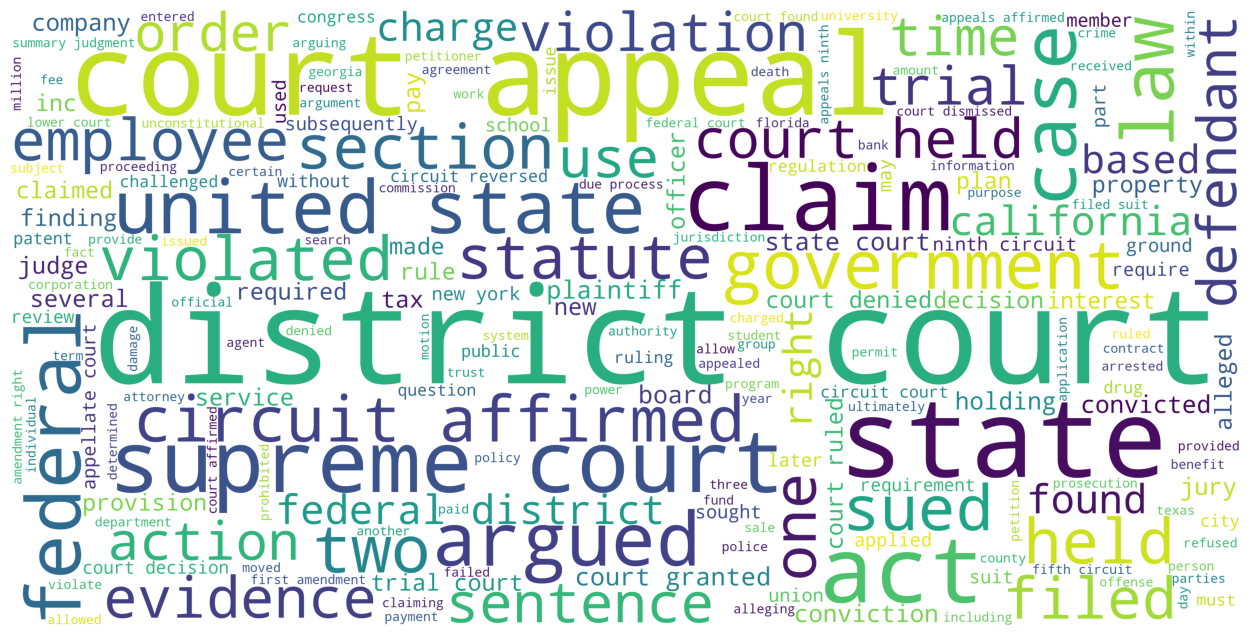

In [22]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(facts_corpus_lose)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

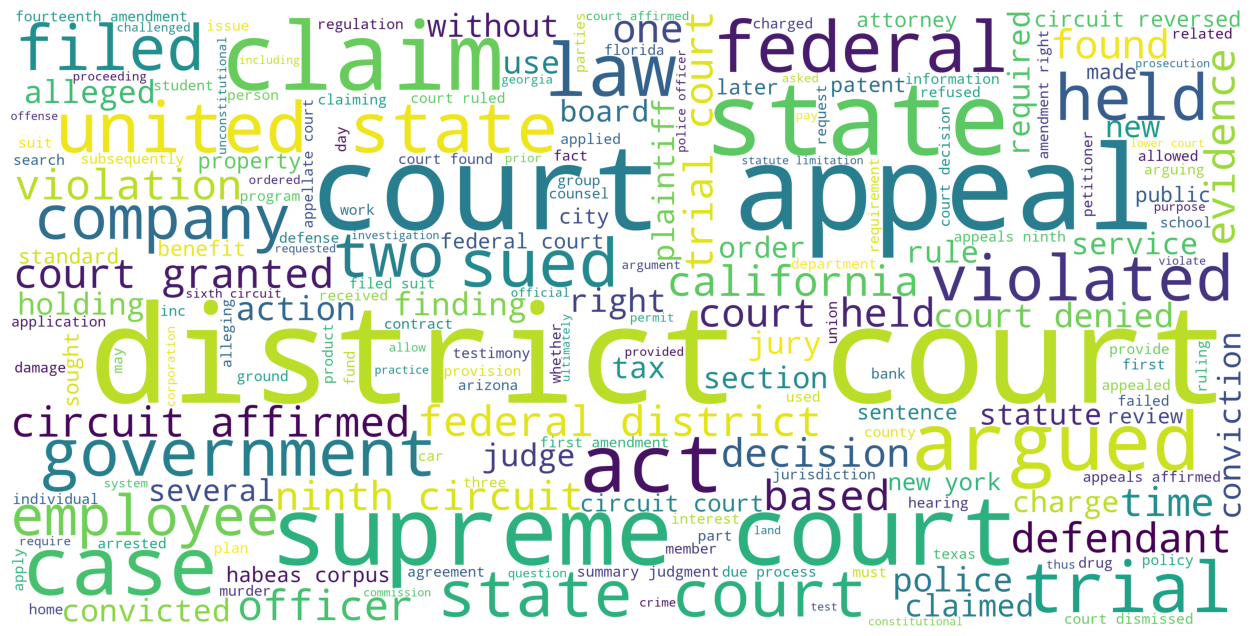

In [23]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(facts_corpus_win)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()